In [1]:
import datetime
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\peter\AppData\Local\Temp\ipykernel_3084\3916720141.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
macroeconomics = pd.read_csv("C:/Users/peter/Documents/Data Science/Final Project/Data/US_macroeconomics.csv")
macroeconomics.head()

,date,CPI,Mortgage_rate,Unemp_rate,NASDAQ,disposable_income,Personal_consumption_expenditure,personal_savings
0,1980-11-01,85.6,14.2050,7.5,200.685556,4976.5,1826.8,11.6
1,1980-12-01,86.4,14.7900,7.2,198.398636,4999.8,1851.7,11.4
2,1981-01-01,87.2,14.9040,7.5,198.817619,4980.4,1870.0,10.9
3,1981-02-01,88.0,15.1325,7.4,194.852105,4965.0,1884.2,10.8
4,1981-03-01,88.6,15.4000,7.4,203.593182,4979.0,1902.9,10.8


In [3]:
macroeconomics['date'] = pd.to_datetime(macroeconomics['date'])

In [4]:
macroeconomics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 8 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   date                              499 non-null    datetime64[ns]
 1   CPI                               499 non-null    float64       
 2   Mortgage_rate                     499 non-null    float64       
 3   Unemp_rate                        499 non-null    float64       
 4   NASDAQ                            499 non-null    float64       
 5   disposable_income                 499 non-null    float64       
 6   Personal_consumption_expenditure  499 non-null    float64       
 7   personal_savings                  499 non-null    float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 31.3 KB


In [5]:
# Stimulus

c = macroeconomics['date'] > '2020-03-01'
macroeconomics['stimulus'] = c

macroeconomics

,date,CPI,Mortgage_rate,Unemp_rate,NASDAQ,disposable_income,Personal_consumption_expenditure,personal_savings,stimulus
0,1980-11-01,85.600,14.2050,7.5,200.685556,4976.5,1826.8,11.6,False
1,1980-12-01,86.400,14.7900,7.2,198.398636,4999.8,1851.7,11.4,False
2,1981-01-01,87.200,14.9040,7.5,198.817619,4980.4,1870.0,10.9,False
3,1981-02-01,88.000,15.1325,7.4,194.852105,4965.0,1884.2,10.8,False
4,1981-03-01,88.600,15.4000,7.4,203.593182,4979.0,1902.9,10.8,False
...,...,...,...,...,...,...,...,...,...
494,2022-01-01,281.933,3.4450,4.0,14531.377500,15163.5,16543.3,5.8,True
495,2022-02-01,284.182,3.7625,3.8,13898.727895,15173.6,16635.8,5.8,True
496,2022-03-01,287.708,4.1720,3.6,13623.263043,15119.6,16831.2,5.3,True
497,2022-04-01,288.663,4.9825,3.6,13394.163000,15154.4,16911.2,5.2,True


In [6]:
macroeconomics.dtypes

date                                datetime64[ns]
CPI                                        float64
Mortgage_rate                              float64
Unemp_rate                                 float64
NASDAQ                                     float64
disposable_income                          float64
Personal_consumption_expenditure           float64
personal_savings                           float64
stimulus                                      bool
dtype: object

In [7]:
macroeconomics.isnull().sum()

date                                0
CPI                                 0
Mortgage_rate                       0
Unemp_rate                          0
NASDAQ                              0
disposable_income                   0
Personal_consumption_expenditure    0
personal_savings                    0
stimulus                            0
dtype: int64

In [8]:
macroeconomics['Personal_consumption_expenditure'].corr(macroeconomics['disposable_income'])

0.9915728718097577

In [9]:
seasonality = macroeconomics[['date', 'disposable_income']]
seasonality.set_index('date', inplace = True)

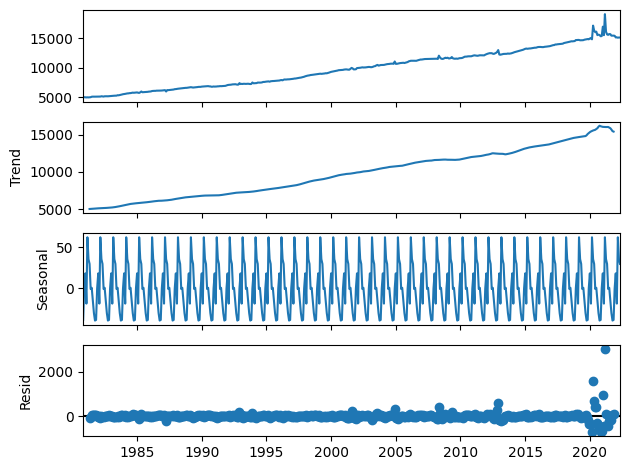

In [10]:
# Seasonality, Disposable Income

from statsmodels.tsa.seasonal import seasonal_decompose

decompose_result_mult = seasonal_decompose(seasonality, model = 'additive')

trend = decompose_result_mult.trend
seasonal = decompose_result_mult.seasonal
residual = decompose_result_mult.resid

fig = decompose_result_mult.plot()

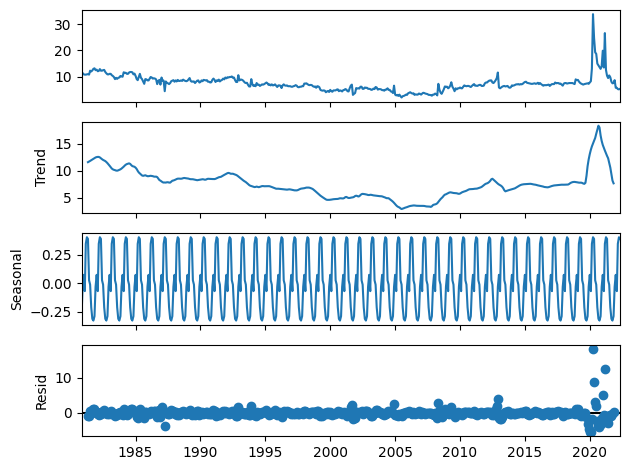

In [11]:
# Seasonality, Personal Savings

seasonality = macroeconomics[['date', 'personal_savings']]
seasonality.set_index('date', inplace=True)

from statsmodels.tsa.seasonal import seasonal_decompose

decompose_result_mult = seasonal_decompose(seasonality, model="additive")

trend = decompose_result_mult.trend
seasonal = decompose_result_mult.seasonal
residual = decompose_result_mult.resid

fig = decompose_result_mult.plot()

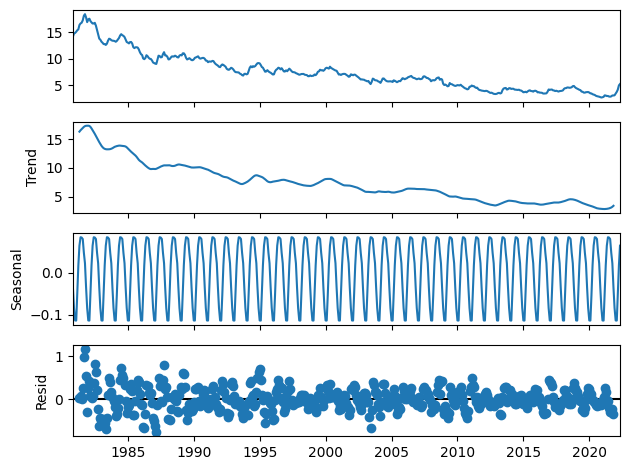

In [12]:
# Seasonality, Mortgage Rates

seasonality = macroeconomics[['date', 'Mortgage_rate']]
seasonality.set_index('date', inplace=True)

from statsmodels.tsa.seasonal import seasonal_decompose

decompose_result_mult = seasonal_decompose(seasonality, model="additive")

trend = decompose_result_mult.trend
seasonal = decompose_result_mult.seasonal
residual = decompose_result_mult.resid

fig = decompose_result_mult.plot()

c:\Users\peter\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\peter\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\peter\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.g

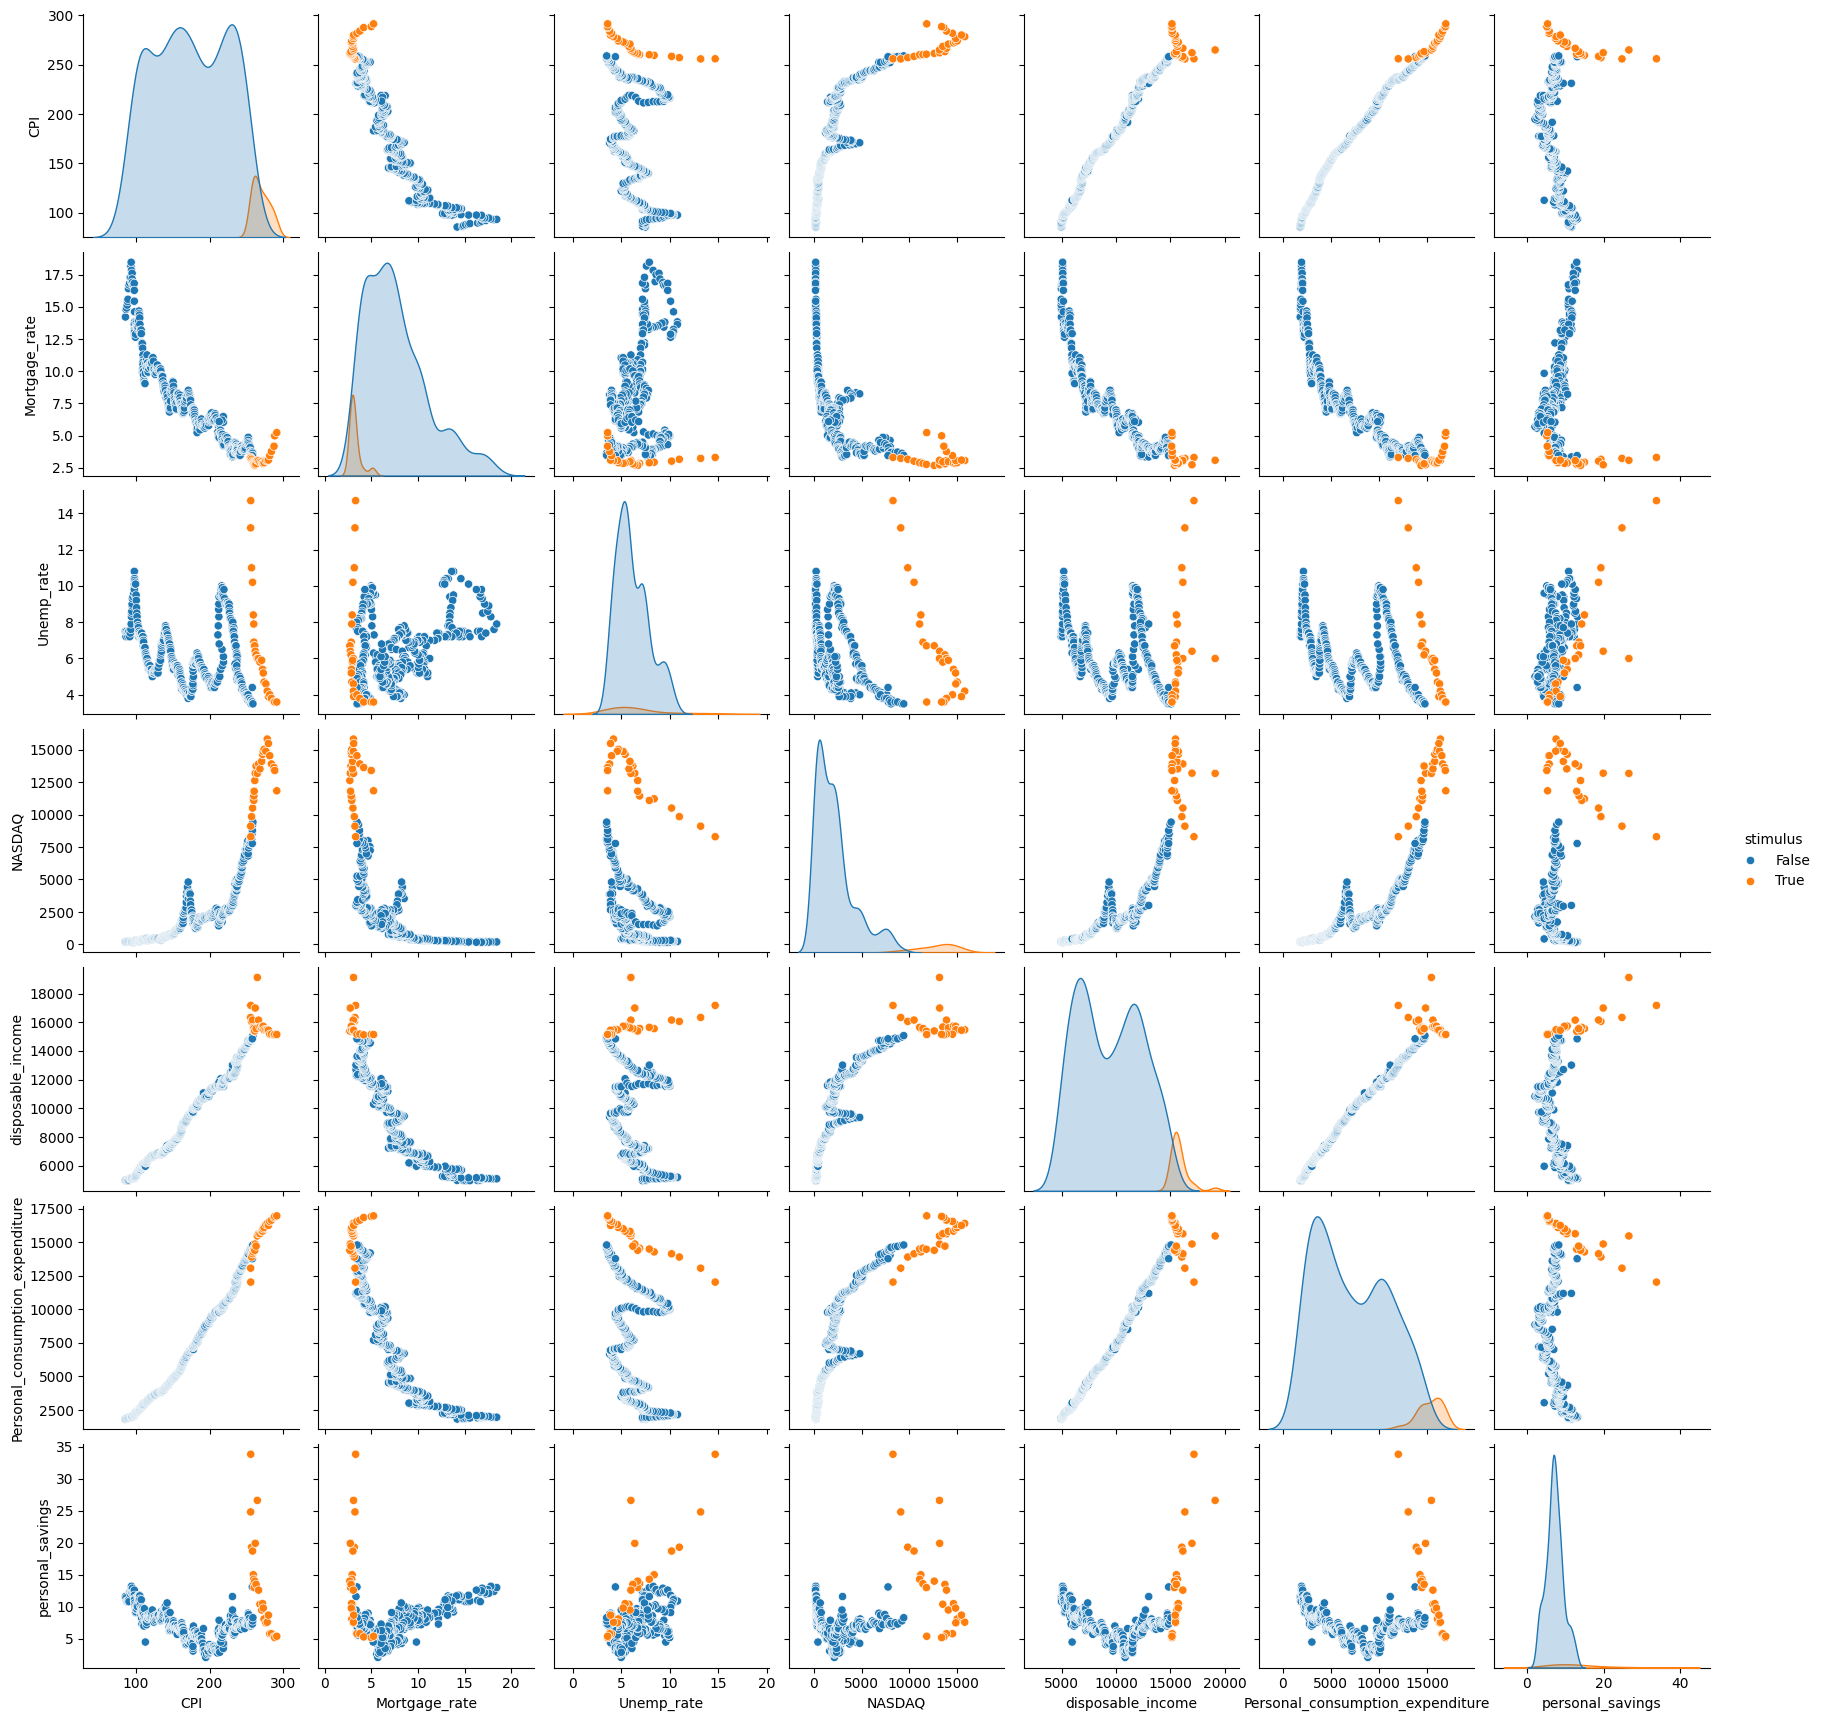

In [13]:
sns.pairplot(macroeconomics, hue = 'stimulus')

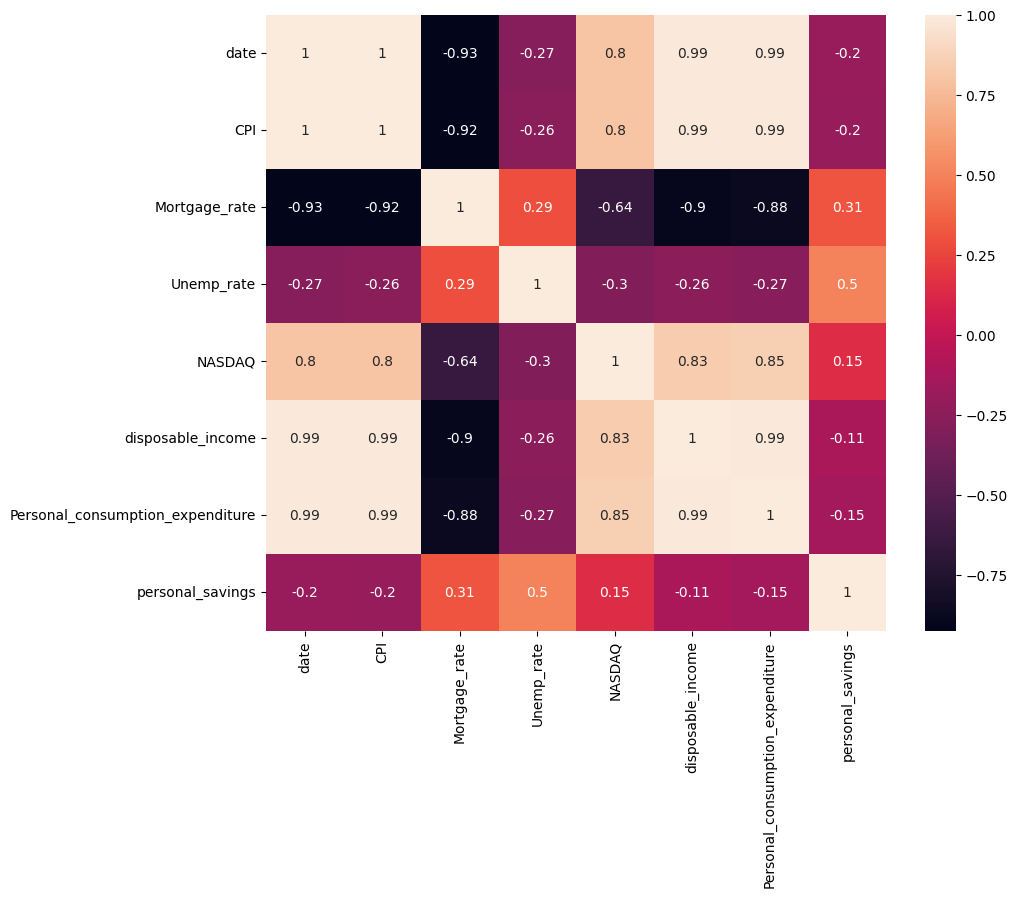

In [14]:
corr = macroeconomics.loc[:, macroeconomics.columns != 'stimulus'].corr()

plt.figure(figsize = (10,8))
sns.heatmap(corr, annot = True)
plt.show()

c:\Users\peter\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\peter\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


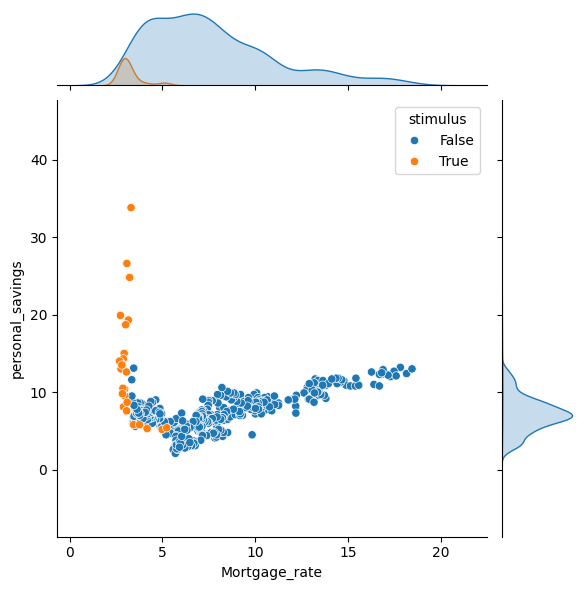

In [15]:
sns.jointplot(data = macroeconomics, y = 'personal_savings', x = 'Mortgage_rate', hue = 'stimulus')

c:\Users\peter\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\peter\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


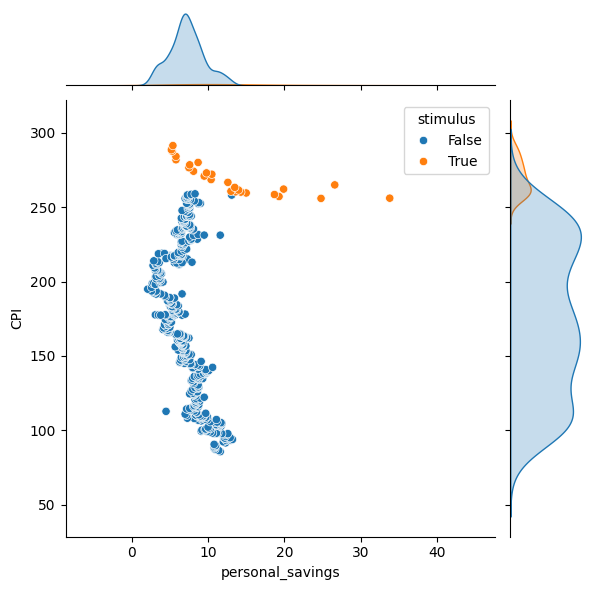

In [16]:
sns.jointplot(data = macroeconomics, y = 'CPI', x = 'personal_savings', hue = 'stimulus')

<Axes: xlabel='date', ylabel='CPI'>

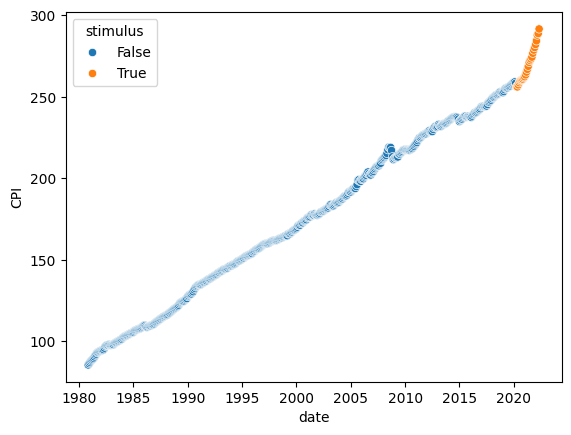

In [17]:
sns.scatterplot(x = "date", 
                y = "CPI", 
                data = macroeconomics, 
                hue = "stimulus")

<Axes: xlabel='date', ylabel='Personal_consumption_expenditure'>

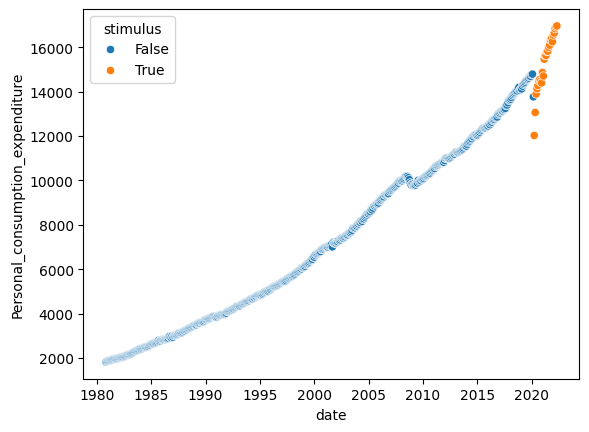

In [18]:
sns.scatterplot(x = 'date', y = 'Personal_consumption_expenditure', data = macroeconomics, hue = 'stimulus')